# 1 What is a Decision Tree, and how does it work?

A Decision Tree is a flowchart-like structure used for classification and regression tasks. It splits the data into subsets based on feature values, creating branches that represent decisions leading to outcomes. At each node, a decision is made based on the feature that provides the best separation of the data.

# 2 What is a Decision Tree Regressor?

A Decision Tree Regressor is a variant of a Decision Tree that is used for predicting continuous values rather than categorical outcomes. It makes predictions by aggregating the values of the target variable for all instances in a leaf node.

# 3 What are impurity measures in Decision Trees?

Impurity measures are metrics used to evaluate the quality of a split in a Decision Tree. They quantify how mixed the classes are in a given subset. Common impurity measures include Gini impurity and entropy.

# 4 What is the mathematical formula for Gini Impurity?

Gini Impurity is calculated using the formula:

Gini=1−∑(pi2)Gini = 1 - \sum (p_i^2)

Gini=1−∑(pi log2 pi)
​


where pi is the proportion of class iii in the dataset.

# 5 What is the mathematical formula for Entropy?

Entropy is calculated using the formula:

Entropy=−∑(pilog⁡2pi)Entropy = -\sum (p_i \log_2 p_i)

Entropy=−∑(pi log2 p i)

where pi is the proportion of class iii in the dataset.

# 6 What is Information Gain, and how is it used in Decision Trees?

Information Gain measures the reduction in entropy or impurity achieved by partitioning the data based on a particular feature. It is used in Decision Trees to identify which feature to split on at each node, with the goal of maximizing the reduction in impurity.

# 7 What is the difference between Gini Impurity and Entropy?

The primary difference between Gini Impurity and Entropy is how they measure impurity. Gini measures the probability of misclassifying a randomly chosen element, while Entropy measures the amount of uncertainty in a random variable. Gini is generally faster to compute, while both typically yield similar results when used for tree-building.

# 8 What is the mathematical explanation behind Decision Trees?

Decision Trees operate by recursively splitting the dataset based on feature values that maximize the information gain or minimize impurity until certain stopping criteria are met. Each split creates a node in the tree, and the process continues until the nodes represent homogenous subsets or other stopping conditions are satisfied.

# 9 What is Pre-Pruning in Decision Trees?

Pre-Pruning is a technique to prevent a Decision Tree from growing too complex and overfitting the data. It involves setting stopping criteria such as maximum tree depth or minimum samples per leaf during the tree construction process, halting further splits when those criteria are met.

# 10. What is Post-Pruning in Decision Trees?

Post-Pruning refers to the process of trimming a fully grown Decision Tree to reduce complexity and improve generalization. This is done by removing nodes that provide little predictive power, typically using validation data to identify which nodes reduce accuracy when removed.


# 11 What is the difference between Pre-Pruning and Post-Pruning?

The difference lies in when the pruning occurs: Pre-Pruning stops the growth of the Decision Tree during its construction, while Post-Pruning reduces the size of the tree after it has been fully grown. Both techniques aim to combat overfitting.

# 12 What are the advantages and disadvantages of Decision Trees?

Advantages of Decision Trees include their interpretability, ease of use, and ability to handle both numerical and categorical data. Disadvantages include their tendency to overfit, sensitivity to small changes in the data, and instability due to the greedy nature of split selection.

# 13 How does a Decision Tree handle missing values?

Decision Trees can handle missing values in various ways, including using surrogate splits, assigning instances with missing values to the most frequent class, or using dedicated methods when building trees to accommodate missing data.

# 14 How does a Decision Tree handle categorical features?

Decision Trees can naturally handle categorical features by splitting on them, creating branches for each category. For binary categorical variables, this process is straightforward, while for multi-class categorical variables, the tree can create multiple branches corresponding to each class.

# 15 What are some real-world applications of Decision Trees?

Decision Trees are widely applied in various fields, including finance for credit scoring and risk assessment, healthcare for patient diagnosis and treatment recommendations, marketing for customer segmentation and targeting, and operations for supply chain management and decision analysis.

# ********************************* Practical **********************************

# 1. Train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

# 2. Train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

In [2]:
# Using the same imports as before
model_gini = DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)

# Get feature importances
importances = model_gini.feature_importances_
print('Feature importances:', importances)

Feature importances: [0.03822004 0.         0.06846677 0.89331319]


# 3. Train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

In [3]:
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print(f'Model accuracy (Entropy): {accuracy_entropy:.2f}')

Model accuracy (Entropy): 0.98


# 4. Train a Decision Tree Classifier and display the feature importance scores.

In [4]:
print('Feature importance scores (Gini):', model.feature_importances_)

Feature importance scores (Gini): [0.         0.01911002 0.08757679 0.89331319]


# 5. Train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}')

Precision: 1.00, Recall: 1.00, F1-Score: 1.00


# 6. Train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

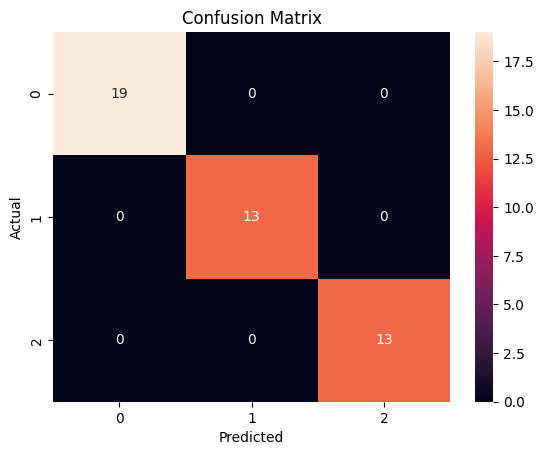

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 7. Train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

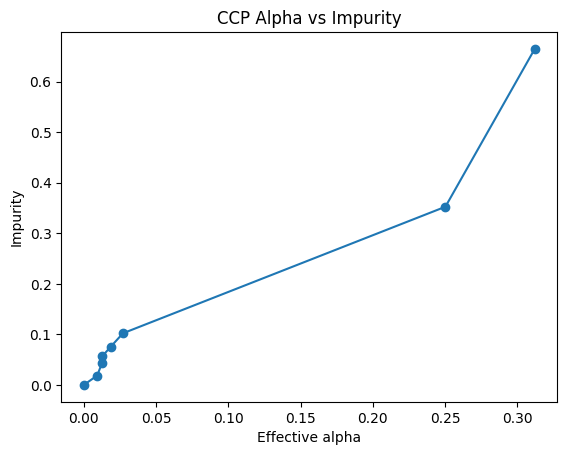

In [7]:
path = model_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plotting the ccp alpha vs. impurity
plt.plot(ccp_alphas, impurities, marker='o')
plt.xlabel('Effective alpha')
plt.ylabel('Impurity')
plt.title('CCP Alpha vs Impurity')
plt.show()

# 8. Train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

In [8]:
from sklearn.multiclass import OneVsRestClassifier

ovr_model = OneVsRestClassifier(DecisionTreeClassifier())
ovr_model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_ovr = ovr_model.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

print(f'Model accuracy (OvR): {accuracy_ovr:.2f}')

Model accuracy (OvR): 1.00


# 9. Train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

In [9]:
model_max_depth = DecisionTreeClassifier(max_depth=3)
model_max_depth.fit(X_train, y_train)
y_pred_max_depth = model_max_depth.predict(X_test)

# Calculate accuracy
accuracy_max_depth = accuracy_score(y_test, y_pred_max_depth)
print(f'Model accuracy (max depth 3): {accuracy_max_depth:.2f}')

Model accuracy (max depth 3): 1.00


# 10. Train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

In [10]:
model_min_samples = DecisionTreeClassifier(min_samples_split=5)
model_min_samples.fit(X_train, y_train)
y_pred_min_samples = model_min_samples.predict(X_test)

# Calculate accuracy
accuracy_min_samples = accuracy_score(y_test, y_pred_min_samples)
print(f'Model accuracy (min_samples_split=5): {accuracy_min_samples:.2f}')

Model accuracy (min_samples_split=5): 1.00


# 11. Apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = DecisionTreeClassifier()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Model accuracy (scaled data): {accuracy_scaled:.2f}')

Model accuracy (scaled data): 1.00


# 12. Use GridSearchCV to find the optimal values for max_depth and min_samples_split.

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print('Best parameters:', best_params)

Best parameters: {'max_depth': None, 'min_samples_split': 10}


# 13. Train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

In [15]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the California housing dataset
cal_housing = fetch_california_housing()
X_reg = cal_housing.data
y_reg = cal_housing.target

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Train the model
regressor = DecisionTreeRegressor()
regressor.fit(X_train_reg, y_train_reg)

# Predict and calculate MSE
y_pred_reg = regressor.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.53


# 14. Train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

In [16]:
regressor_depth = DecisionTreeRegressor(max_depth=5)
regressor_depth.fit(X_train_reg, y_train_reg)
y_pred_depth = regressor_depth.predict(X_test_reg)

# Calculate MSE
mse_depth = mean_squared_error(y_test_reg, y_pred_depth)
print(f'Mean Squared Error (max depth 5): {mse_depth:.2f}')

Mean Squared Error (max depth 5): 0.52


# 15. Train a Decision Tree Classifier and visualize the tree using graphviz.

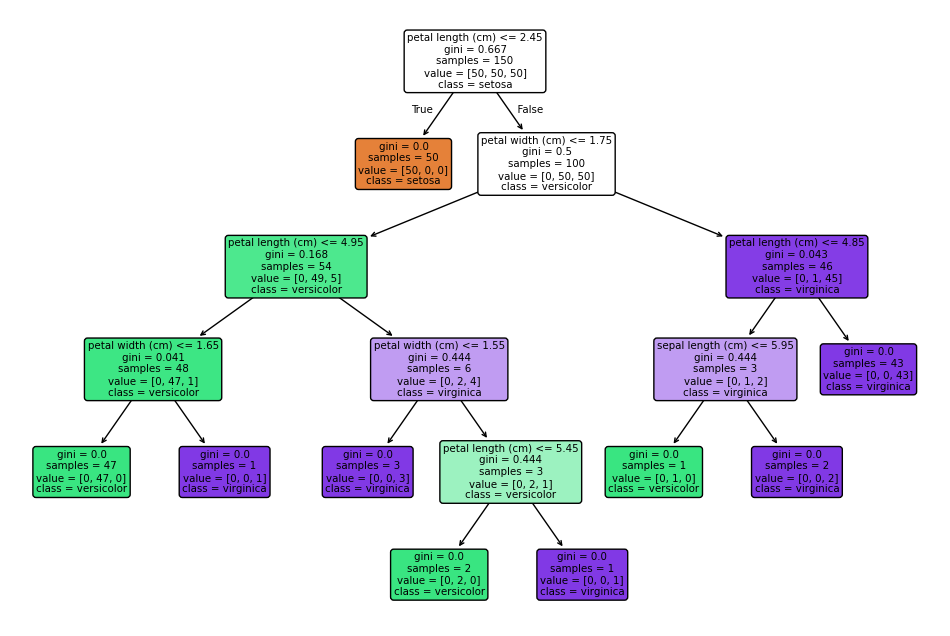

In [5]:
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the size of the plot
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)

# Display the plot
plt.show()